In [1]:
print("hello world")

hello world


In [7]:
%pip install librosa==0.9.2 seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install matplotlib==3.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 3.1 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/f1/6b/e4b0f8708f22dd7c321f87eadbb98708975e115ac6582eb46d1f32197ce6/contourpy-1.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/ac/ed/9a33eca5e2cc35dc1fea0a968509c653db9a99a5979656ae57c6c019d66b/fonttools-4.43.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 kB 4.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 3.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully 

In [9]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio

import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

2023-11-02 09:26:14.059643: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-02 09:26:14.349122: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
RAVD = "data_sources/RAVDESS/audio_speech_actors_01-24/"

In [11]:
dirl_list = os.listdir(RAVD)
dirl_list.sort()

emotion = []
gender = []
path = []
for i in dirl_list:
    fname = os.listdir(RAVD + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAVD + i + '/' + f)

        
emotion_mapping = {
    1: "_neutral",
    2: "_calm",
    3: "_happy",
    4: "_sad",
    5: "_angry",
    6: "_fearful",
    7: "_disgust",
    8: "_surprised"
}

# Convert emotion numbers to emotion names
emotion = [gender[i] + emotion_mapping[e] for i, e in enumerate(emotion)]

# Create a cuDF DataFrame
RAVD_df = pd.DataFrame({'labels': emotion, 'source': 'RAVDESS', 'Path': path})

# Print the resulting cuDF DataFrame
RAVD_df.head()

labels   source                                               Path
0  male_neutral  RAVDESS  data_sources/RAVDESS/audio_speech_actors_01-24...
1  male_neutral  RAVDESS  data_sources/RAVDESS/audio_speech_actors_01-24...
2  male_neutral  RAVDESS  data_sources/RAVDESS/audio_speech_actors_01-24...
3  male_neutral  RAVDESS  data_sources/RAVDESS/audio_speech_actors_01-24...
4     male_calm  RAVDESS  data_sources/RAVDESS/audio_speech_actors_01-24...

/tmp/ipykernel_425/285250525.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_pd, x='labels', palette='bright')


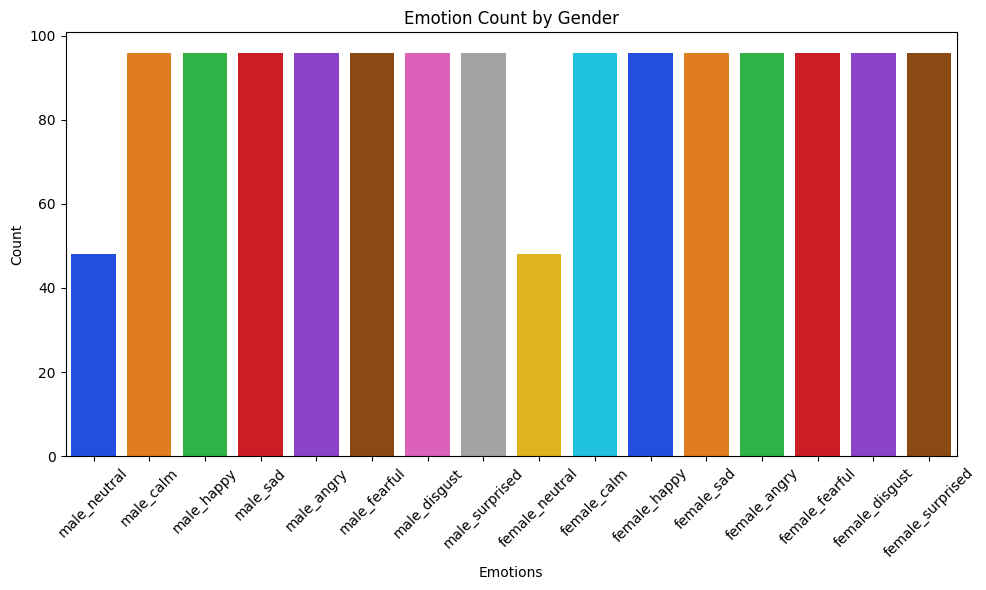

In [12]:
df_pd = RAVD_df

# Create a colorful barplot using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df_pd, x='labels', palette='bright')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.title("Emotion Count by Gender")
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
fRA1= RAVD + 'Actor_08/03-01-03-02-02-01-08.wav'
data, sr = librosa.load(fRA1)
ipd.Audio(fRA1) 


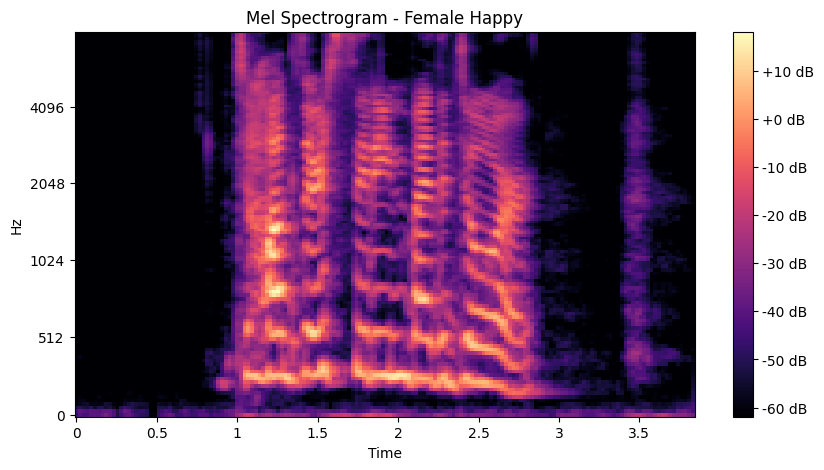

In [14]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Female Happy')
plt.colorbar(format='%+2.0f dB')

In [15]:
#Female Fear
fRA2=RAVD +'Actor_08/03-01-06-01-01-01-08.wav'
data, sr = librosa.load(fRA2)
ipd.Audio(fRA2) 

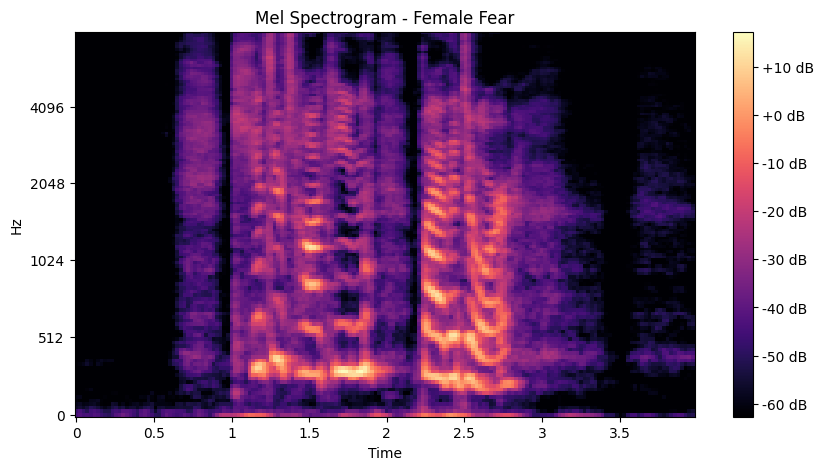

In [16]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - Female Fear')
plt.colorbar(format='%+2.0f dB')

In [17]:
# Female Disgust
fRA1 =RAVD +'Actor_20/03-01-08-02-02-02-20.wav'
data, sr = librosa.load(fRA1)
ipd.Audio(fRA1) 

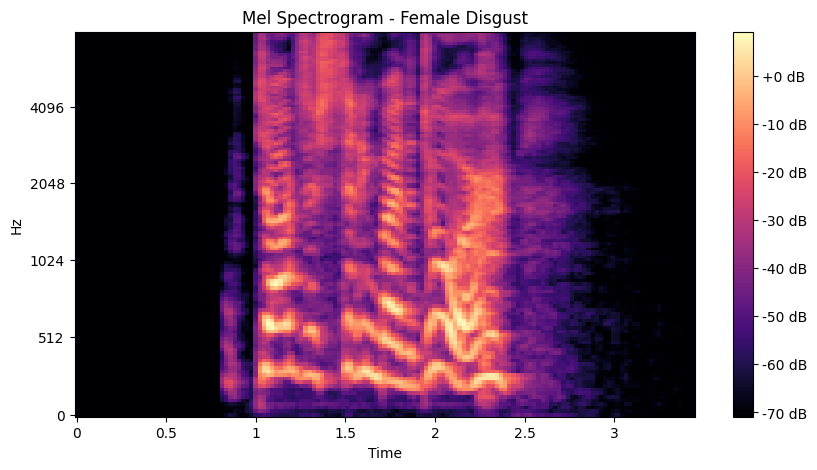

In [18]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Disgust')
plt.colorbar(format='%+2.0f dB');

In [19]:
# Male Fearfull
fRA1 = RAVD + 'Actor_19/03-01-04-01-02-01-19.wav'
data, sr = librosa.load(fRA1)
ipd.Audio(fRA1)

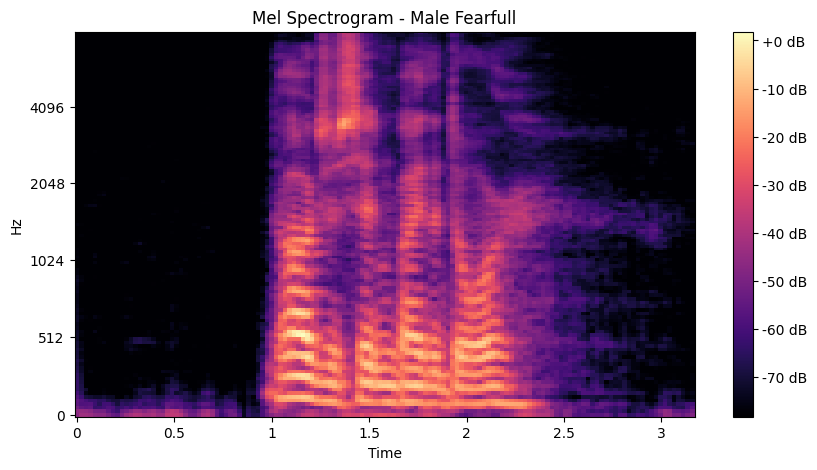

In [20]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Fearfull')
plt.colorbar(format='%+2.0f dB');

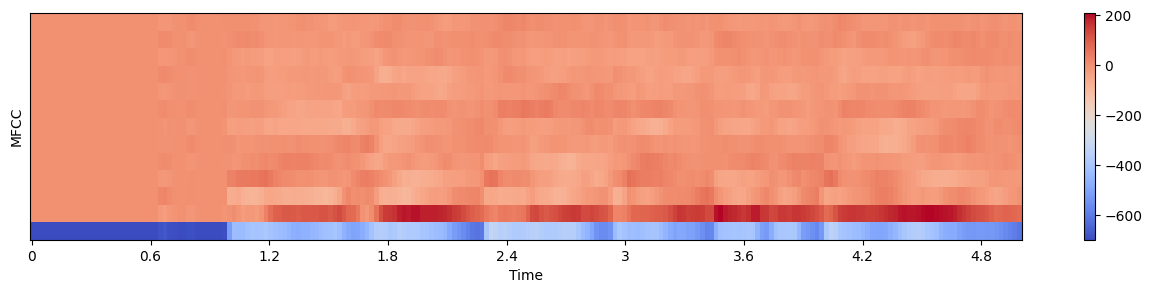

In [21]:
# Gender - Female; Emotion - Angry 
path = RAVD + "Actor_18/03-01-05-01-01-01-18.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

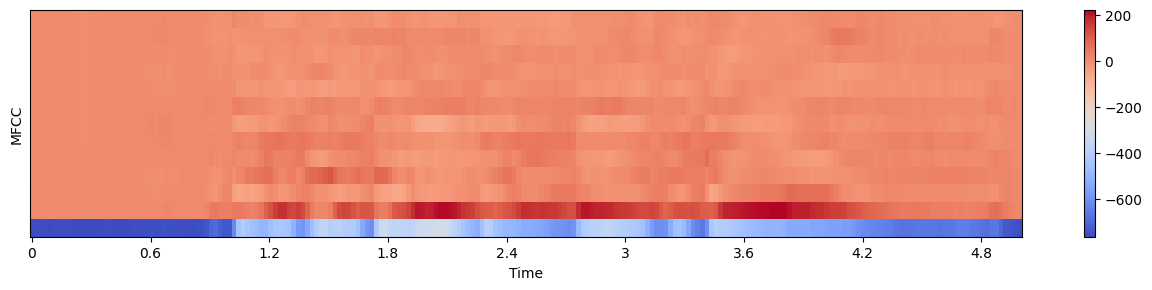

In [22]:
# Gender - Male; Emotion - Angry 
path = RAVD + "Actor_17/03-01-05-01-01-02-17.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

216
216


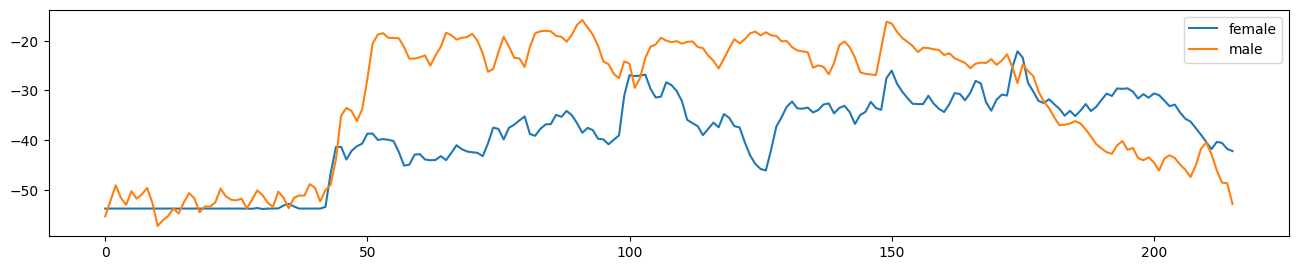

In [23]:
# Gender - Female; Emotion - angry
path = RAVD + "Actor_18/03-01-05-01-01-01-18.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Gender - Male; Emotion - angry
path = RAVD + "Actor_17/03-01-05-01-01-02-17.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(16,10))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

216
216


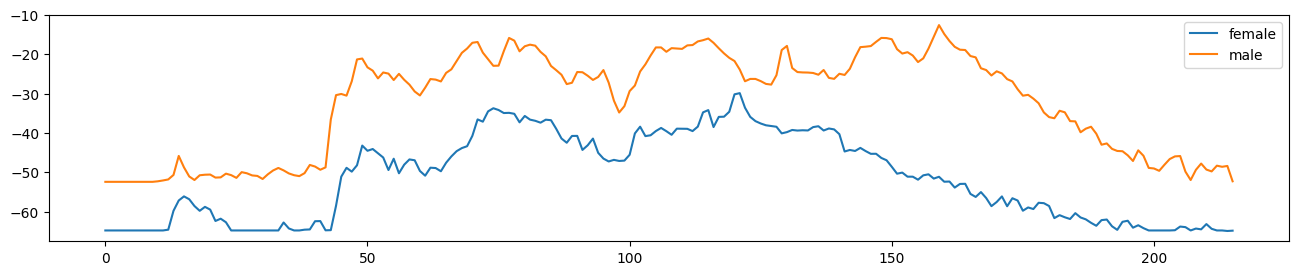

In [24]:
# Gender - Female; Emotion - Surprised
path = RAVD + "Actor_20/03-01-08-02-01-02-20.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Gender - Male; Emotion - Surprised
path = RAVD + "Actor_21/03-01-08-02-01-01-21.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(16,10))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

In [25]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data
# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [26]:
path = np.array(RAVD_df['Path'])[471]
data, sample_rate = librosa.load(path)

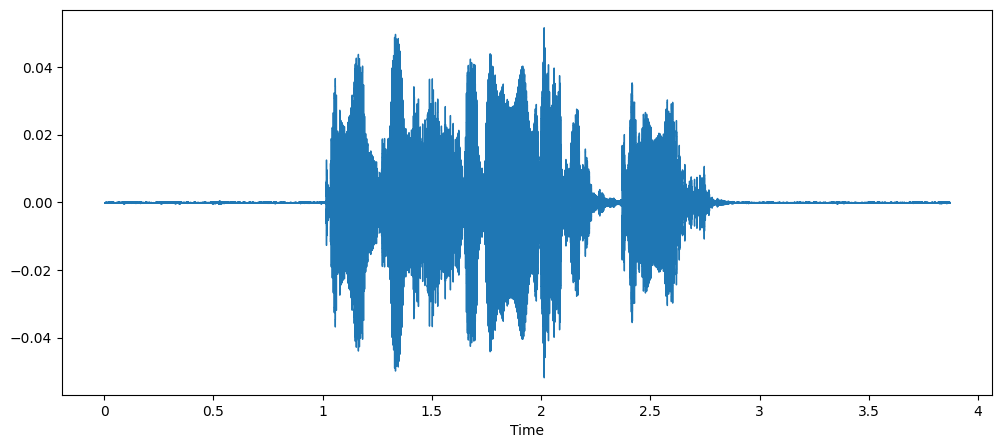

In [27]:
# NORMAL AUDIO
import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

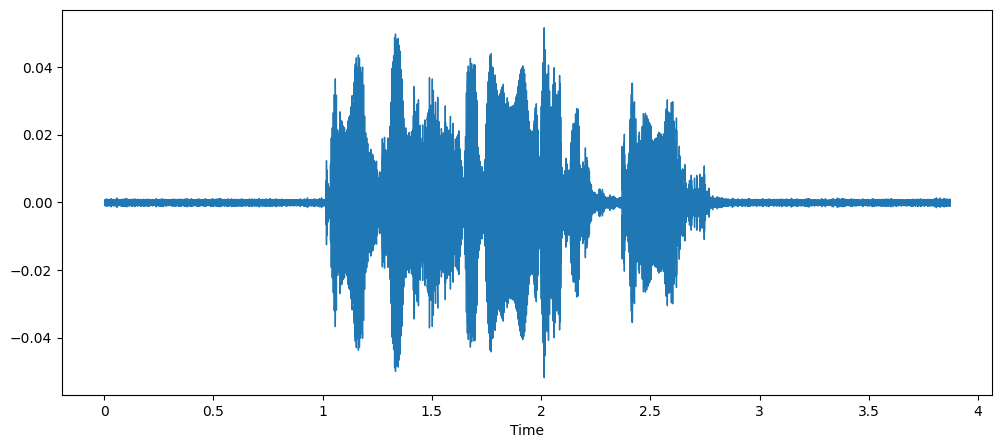

In [28]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

/tmp/ipykernel_425/2885520536.py:8: FutureWarning: Pass rate=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, rate)


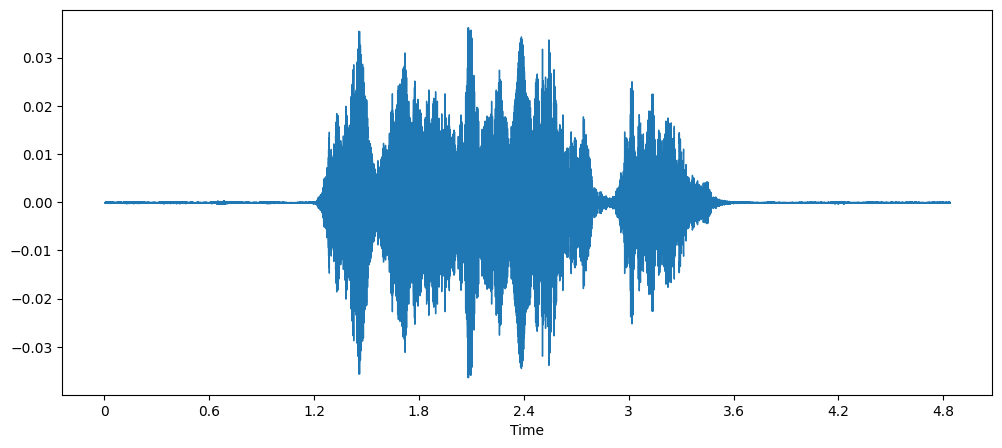

In [29]:
# STRETCHED AUDIO
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

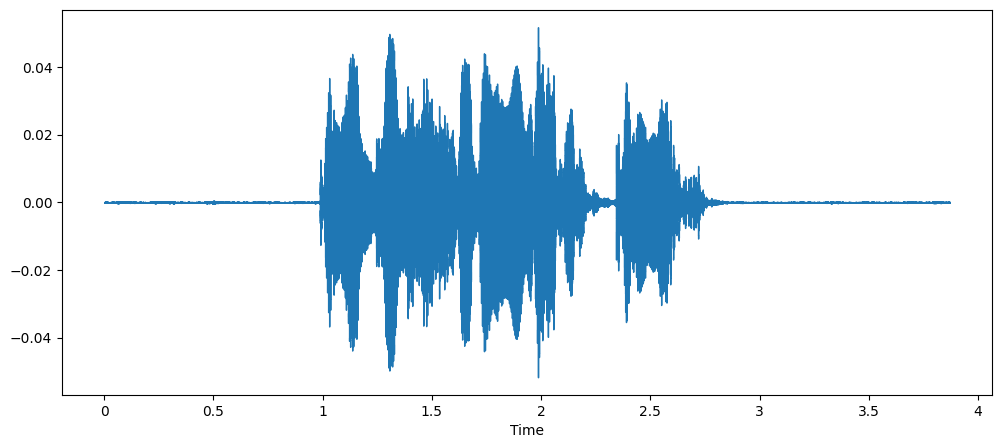

In [30]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

/tmp/ipykernel_425/2885520536.py:15: FutureWarning: Pass sr=22050, n_steps=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


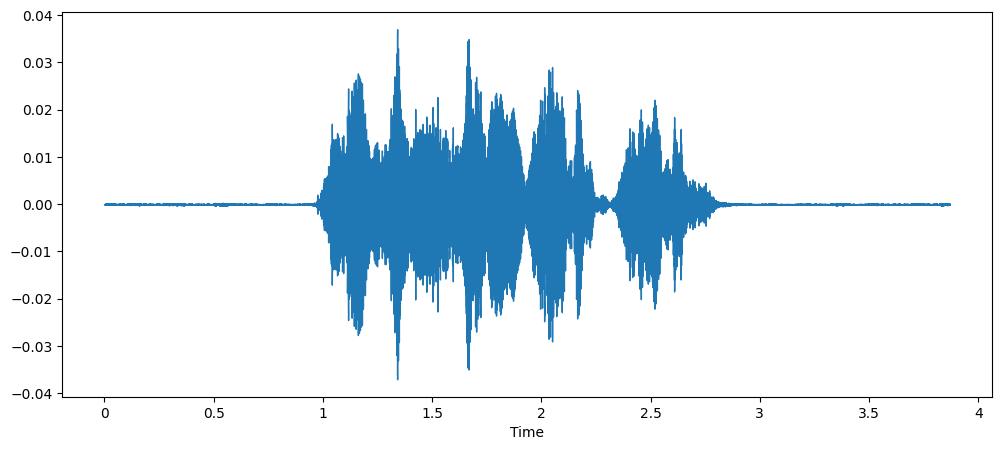

In [31]:
# AUDIO WITH PITCH
x = pitch(data, sample_rate)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [32]:
# can use this directly from saved feature .csv file
Emotions = pd.read_csv('./data_sources/features.csv')
Emotions.head(10)

0           1          2          3          4          5  \
0 -637.701233  104.299019   4.894947  20.494011  12.552954   2.851410   
1 -596.908460   86.871936   9.470162  17.109819  11.198966   1.541056   
2 -698.086548   99.795929   1.892679  19.915264   7.532868   1.265761   
3 -279.141052   41.092949 -21.319229   7.802911 -13.140503  -9.407660   
4 -160.074686   17.576058  -2.147436   3.133417  -4.745002  -6.510771   
5 -331.021576   39.745705 -22.860626   6.353040 -16.374424 -11.440884   
6 -513.024658   77.117638  -3.092357  18.273544   9.781045  -4.164429   
7 -387.372659   41.855483   5.128738  10.359619   5.100620  -2.914952   
8 -569.199890   76.337303  -4.784514  18.143469   5.091405  -5.657932   
9 -644.859009   69.573090   2.603384  16.992235   7.469007   2.995506   

           6          7          8         9  ...         11        12  \
0  -6.633390  -4.091278 -10.423918 -6.406950  ...   0.172893 -1.170210   
1  -6.677264  -5.755428  -9.684472 -6.891256  ...   0.033803 -1.986515   
2  -9.188656  -5.798194 -12.299710 -4.976400  ...  -1.639542 -2.603761   
3 -15.580647  -6.097223 -24.700903 -9.640293  ... -10.305976 -4.092835   
4  -5.911591  -4.481506  -9.470598 -5.907823  ...  -4.088007 -1.817639   
5 -17.602816  -9.509995 -27.061333 -6.779751  ...  -9.512968 -3.978928   
6  -6.952114 -11.518868 -18.644827 -2.869786  ...  -1.636451  2.136385   
7  -4.287355 -10.344514 -13.325824 -7.179832  ...  -3.016655 -0.718703   
8  -8.168710 -15.191656 -18.793329 -1.620375  ...   2.001433  1.337125   
9  -2.625710  -7.836775 -13.316399 -4.526955  ...  -2.389072 -0.242245   

         13         14        15         16        17        18        19  \
0 -5.292450  -0.573319  1.019471  -3.492607 -3.468123 -1.214944  1.971239   
1 -5.103855  -1.253110  0.514896  -3.268317 -4.502895  0.167153  0.256732   
2 -4.890347  -0.879222 -1.250208  -3.449960 -4.708529 -0.086224 -3.034044   
3 -5.817179 -10.731523 -0.823596 -15.885103 -2.014258 -6.173852 -5.331760   
4 -2.994765  -4.893176 -2.880436  -7.163400 -2.147345 -2.359248 -3.746217   
5 -8.940723  -9.396315 -3.595846 -16.388462  1.839664 -6.579001 -1.339286   
6 -7.296048  -0.705865  5.506454  -8.749706 -3.968178 -2.807970 -2.808649   
7 -5.764693  -3.133508  1.839359  -6.286464 -5.601748 -1.164403 -4.545545   
8 -6.697247   3.236744  3.241865 -10.945348 -1.001623 -1.710050 -4.699695   
9 -3.906938  -2.942741  1.678185  -6.506072 -2.595646 -0.604484 -0.405804   

         labels  
0     male_calm  
1     male_calm  
2     male_calm  
3    male_angry  
4    male_angry  
5    male_angry  
6     male_fear  
7     male_fear  
8     male_fear  
9  male_neutral  

[10 rows x 21 columns]

In [33]:
Emotions.tail(10)

0          1          2          3          4          5  \
4310 -475.995270  43.151836 -38.574219 -13.547400 -25.846369 -18.263540   
4311 -423.005920  47.749493 -29.665493  -4.295058 -23.631018 -27.263391   
4312 -328.783005  28.413875 -10.835877  -6.340782 -14.256126 -16.440777   
4313 -473.705780  46.054489 -35.544331  -7.220710 -29.149464 -29.147966   
4314 -391.787048  34.622280  -9.712089   2.446228 -17.915855  -7.486414   
4315 -244.806780   9.993918   0.283868  -1.826234  -9.474588  -3.677899   
4316 -451.196869  34.551537 -12.766367  -0.469773 -20.480389  -6.061997   
4317 -468.095856  72.921646 -30.435776   1.022192 -21.219824 -16.871128   
4318 -316.846572  25.029758  -1.088165  -5.131652  -8.242224 -10.109052   
4319 -519.270569  68.224586 -32.098141   0.068700 -24.746216 -17.248474   

              6          7          8         9  ...         11         12  \
4310 -28.318960 -21.685135 -12.201660 -6.044500  ...  -1.079530 -15.855438   
4311 -20.327011 -18.959953 -11.658192 -0.457643  ...   8.052330  -6.654205   
4312 -11.934579 -12.501695  -6.485621 -1.671917  ...   3.274122  -2.040629   
4313 -23.514315 -22.591084 -10.204675 -0.766845  ...  10.823739  -9.896004   
4314 -16.055861 -12.600985  -3.295674 -6.704569  ...  -3.435545 -11.848571   
4315  -5.997603  -4.322441  -2.980860 -4.393075  ...  -4.463648  -5.939352   
4316 -19.653013 -11.039007  -4.434286 -8.410524  ...  -3.873847 -11.018853   
4317 -21.545273 -21.955904 -20.282740 -1.485851  ...  -7.835970  -2.132884   
4318 -10.533463  -9.292198  -9.566851 -0.569008  ...  -0.819196  -0.126867   
4319 -25.162642 -23.310534 -19.980129  0.332622  ...  -4.009926  -3.933697   

             13         14         15        16        17         18  \
4310  -6.634547 -11.915824 -10.732101 -9.875604 -8.044907  -7.766987   
4311  -0.998133   1.398740  -5.991436  0.508843 -1.504984  -6.950370   
4312  -1.252094   0.061030  -4.848090 -0.286543 -0.716603  -3.779984   
4313   3.403025  -1.816671  -4.585443  2.487091 -2.055456  -3.252439   
4314   1.725633  -1.627022  -3.722835 -3.422006  3.783872  -2.015613   
4315  -1.430617  -2.571979  -3.112922  0.026468  2.115303   0.063575   
4316   4.842587  -4.569864  -3.723229 -1.223427  5.745018  -1.755407   
4317 -11.058331  -7.532458  -8.098359 -9.061543 -2.551595 -10.330959   
4318  -2.193538  -2.355684  -1.987450 -3.002287 -0.957942  -2.840216   
4319 -11.725580  -8.221017  -8.974242 -8.297355 -3.381265 -12.385256   

             19           labels  
4310   1.541813   female_disgust  
4311   3.836444  female_surprise  
4312   1.215952  female_surprise  
4313   7.745300  female_surprise  
4314   3.890181  female_surprise  
4315   3.497223  female_surprise  
4316  11.676798  female_surprise  
4317  -5.266533   female_disgust  
4318  -2.458961   female_disgust  
4319  -4.909779   female_disgust  

[10 rows x 21 columns]

In [34]:
X = Emotions.iloc[: ,:-1].values
Y = Emotions['labels'].values

In [35]:
# As this is a multiclass classification problem onehotencoding our Y
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [36]:
# Train and Test Split 
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 20), (3240, 16), (1080, 20), (1080, 16))

In [37]:
# Reshape for LSTM 
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [38]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 20), (3240, 16), (1080, 20), (1080, 16))

### Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
clf3 = DecisionTreeClassifier()

clf3 = clf3.fit(x_train,y_train)

y_pred = clf3.predict(x_test)

In [40]:
print("Training set score: {:.3f}".format(clf3.score(x_train, y_train)))
print("Test set score: {:.3f}".format(clf3.score(x_test, y_test)))

Training set score: 1.000
Test set score: 0.376


In [41]:
from sklearn.neighbors import KNeighborsClassifier
clf1=KNeighborsClassifier(n_neighbors=4)
clf1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [42]:
y_pred=clf1.predict(x_test)

In [43]:
print("Training set score: {:.3f}".format(clf1.score(x_train, y_train)))
print("Test set score: {:.3f}".format(clf1.score(x_test, y_test)))

Training set score: 0.637
Test set score: 0.449


In [44]:
from sklearn.neural_network import MLPClassifier
clf2=MLPClassifier(alpha=0.01, batch_size=270, epsilon=1e-08, hidden_layer_sizes=(400,), learning_rate='adaptive', max_iter=400)
clf2.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.01, batch_size=270, hidden_layer_sizes=(400,),
              learning_rate='adaptive', max_iter=400)

In [45]:
print("Training set score: {:.3f}".format(clf2.score(x_train, y_train)))
print("Test set score: {:.3f}".format(clf2.score(x_test, y_test)))

Training set score: 0.941
Test set score: 0.618


In [46]:
#`model03 = Sequential()` is creating a sequential model in Keras. A sequential model is a linear stack of layers, where each layer has exactly one input tensor and one output tensor.
model03 = Sequential()
model03.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model03.add(Dropout(0.3))
model03.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model03.add(Dropout(0.3))
model03.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model03.add(Dropout(0.3))
model03.add(GRU(units=50, activation='tanh'))
model03.add(Dropout(0.3))
model03.add(Dense(units=16))
model03.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False),loss='mean_squared_error',metrics=['accuracy'])

2023-11-02 09:26:46.346491: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-02 09:26:46.414975: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-02 09:26:46.415029: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-02 09:26:46.419015: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-02 09:26:46.419065: I tensorflow/compile

In [47]:
model03.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 20, 50)            7950      
                                                                 
 dropout (Dropout)           (None, 20, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 20, 50)            15300     
                                                                 
 dropout_1 (Dropout)         (None, 20, 50)            0         
                                                                 
 gru_2 (GRU)                 (None, 20, 50)            15300     
                                                                 
 dropout_2 (Dropout)         (None, 20, 50)            0         
                                                                 
 gru_3 (GRU)                 (None, 50)                1

In [48]:
model03.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=200)

Epoch 1/100


2023-11-02 09:26:50.309977: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8905
2023-11-02 09:26:50.405833: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:625] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-11-02 09:26:50.439579: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f43f86036c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-02 09:26:50.439612: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-11-02 09:26:50.687539: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


17/17 [==============================] - 4s 57ms/step - loss: 0.0884 - accuracy: 0.0713 - val_loss: 0.0639 - val_accuracy: 0.0611
Epoch 2/100
17/17 [==============================] - 0s 15ms/step - loss: 0.0699 - accuracy: 0.0657 - val_loss: 0.0593 - val_accuracy: 0.0889
Epoch 3/100
17/17 [==============================] - 0s 16ms/step - loss: 0.0654 - accuracy: 0.0759 - val_loss: 0.0585 - val_accuracy: 0.1009
Epoch 4/100
17/17 [==============================] - 0s 15ms/step - loss: 0.0639 - accuracy: 0.0682 - val_loss: 0.0581 - val_accuracy: 0.1222
Epoch 5/100
17/17 [==============================] - 0s 15ms/step - loss: 0.0628 - accuracy: 0.0818 - val_loss: 0.0580 - val_accuracy: 0.1269
Epoch 6/100
17/17 [==============================] - 0s 15ms/step - loss: 0.0625 - accuracy: 0.0753 - val_loss: 0.0579 - val_accuracy: 0.1370
Epoch 7/100
17/17 [==============================] - 0s 16ms/step - loss: 0.0622 - accuracy: 0.0691 - val_loss: 0.0579 - val_accuracy: 0.1417
Epoch 8/100
17/17 

In [49]:
print("Accuracy of our model on test data : " , model03.evaluate(X_test,y_test)[1]*100 , "%")

34/34 [==============================] - 0s 6ms/step - loss: 0.0567 - accuracy: 0.1806
Accuracy of our model on test data :  18.05555522441864 %


### LSTM

In [50]:
model01=Sequential()
model01.add(LSTM(70,return_sequences=True,input_shape=(20,1)))
model01.add(LSTM(50,return_sequences=True))
model01.add(LSTM(60))
model01.add(Dense(16))
model01.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [51]:
model01.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 70)            20160     
                                                                 
 lstm_1 (LSTM)               (None, 20, 50)            24200     
                                                                 
 lstm_2 (LSTM)               (None, 60)                26640     
                                                                 
 dense_1 (Dense)             (None, 16)                976       
                                                                 
Total params: 71976 (281.16 KB)
Trainable params: 71976 (281.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
model01.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=65,verbose=1)

Epoch 1/100


2023-11-02 09:27:20.333292: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


50/50 [==============================] - 4s 28ms/step - loss: 0.0576 - accuracy: 0.1707 - val_loss: 0.0557 - val_accuracy: 0.1935
Epoch 2/100
50/50 [==============================] - 1s 13ms/step - loss: 0.0551 - accuracy: 0.2170 - val_loss: 0.0547 - val_accuracy: 0.2546
Epoch 3/100
50/50 [==============================] - 1s 12ms/step - loss: 0.0543 - accuracy: 0.2494 - val_loss: 0.0544 - val_accuracy: 0.2352
Epoch 4/100
50/50 [==============================] - 1s 12ms/step - loss: 0.0539 - accuracy: 0.2506 - val_loss: 0.0537 - val_accuracy: 0.2435
Epoch 5/100
50/50 [==============================] - 1s 13ms/step - loss: 0.0535 - accuracy: 0.2568 - val_loss: 0.0535 - val_accuracy: 0.2481
Epoch 6/100
50/50 [==============================] - 1s 13ms/step - loss: 0.0529 - accuracy: 0.2710 - val_loss: 0.0531 - val_accuracy: 0.2657
Epoch 7/100
50/50 [==============================] - 1s 13ms/step - loss: 0.0522 - accuracy: 0.2775 - val_loss: 0.0526 - val_accuracy: 0.2704
Epoch 8/100
50/50 

In [53]:
print("Accuracy of our model on test data : " , model01.evaluate(X_test,y_test)[1]*100 , "%")

34/34 [==============================] - 0s 5ms/step - loss: 0.0356 - accuracy: 0.6389
Accuracy of our model on test data :  63.88888955116272 %


### CNN

In [54]:
#CNN
x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

((3240, 20, 1), (3240, 16), (1080, 20, 1), (1080, 16))

In [55]:
model = Sequential()
model.add(Conv1D(2048, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model.add(BatchNormalization())

model.add(Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model.add(BatchNormalization())

model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model.add(BatchNormalization())

model.add(LSTM(256, return_sequences=True))

model.add(LSTM(128))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(16, activation='softmax'))

optimiser = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 20, 2048)          12288     
                                                                 
 max_pooling1d (MaxPooling1  (None, 10, 2048)          0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 10, 2048)          8192      
 Normalization)                                                  
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 1024)          10486784  
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 5, 1024)           0         
 g1D)                                                            
                                                      

In [56]:
history = model.fit(x_traincnn, y_train, batch_size=64, epochs=150, validation_data=(x_testcnn, y_test))

Epoch 1/150


2023-11-02 09:28:32.968096: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.50GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


 2/51 [>.............................] - ETA: 22s - loss: 2.7627 - accuracy: 0.0547 

2023-11-02 09:28:33.820471: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.50GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


 3/51 [>.............................] - ETA: 19s - loss: 2.7672 - accuracy: 0.0469

2023-11-02 09:28:34.162518: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.50GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


 5/51 [=>............................] - ETA: 14s - loss: 2.7731 - accuracy: 0.0500

2023-11-02 09:28:34.503642: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.50GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


51/51 [==============================] - ETA: 0s - loss: 2.7577 - accuracy: 0.0799

2023-11-02 09:28:36.306033: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.50GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


51/51 [==============================] - 10s 82ms/step - loss: 2.7577 - accuracy: 0.0799 - val_loss: 2.7684 - val_accuracy: 0.1000
Epoch 2/150
51/51 [==============================] - 2s 31ms/step - loss: 2.7208 - accuracy: 0.1065 - val_loss: 2.7637 - val_accuracy: 0.0954
Epoch 3/150
 1/51 [..............................] - ETA: 1s - loss: 2.7181 - accuracy: 0.1406

2023-11-02 09:28:38.927038: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.50GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


51/51 [==============================] - 1s 25ms/step - loss: 2.6890 - accuracy: 0.1278 - val_loss: 2.7689 - val_accuracy: 0.0611
Epoch 4/150
51/51 [==============================] - 1s 25ms/step - loss: 2.6349 - accuracy: 0.1389 - val_loss: 2.7756 - val_accuracy: 0.0611
Epoch 5/150
51/51 [==============================] - 1s 27ms/step - loss: 2.5709 - accuracy: 0.1645 - val_loss: 2.7955 - val_accuracy: 0.0611
Epoch 6/150
51/51 [==============================] - 1s 24ms/step - loss: 2.4983 - accuracy: 0.1914 - val_loss: 2.8040 - val_accuracy: 0.0611
Epoch 7/150
51/51 [==============================] - 1s 24ms/step - loss: 2.3968 - accuracy: 0.2151 - val_loss: 2.7850 - val_accuracy: 0.0676
Epoch 8/150
51/51 [==============================] - 1s 24ms/step - loss: 2.3152 - accuracy: 0.2253 - val_loss: 2.5833 - val_accuracy: 0.1370
Epoch 9/150
51/51 [==============================] - 1s 25ms/step - loss: 2.2272 - accuracy: 0.2633 - val_loss: 2.4308 - val_accuracy: 0.1685
Epoch 10/150
51/51

In [57]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

34/34 [==============================] - 0s 9ms/step - loss: 1.2286 - accuracy: 0.8250
Accuracy of our model on test data :  82.4999988079071 %


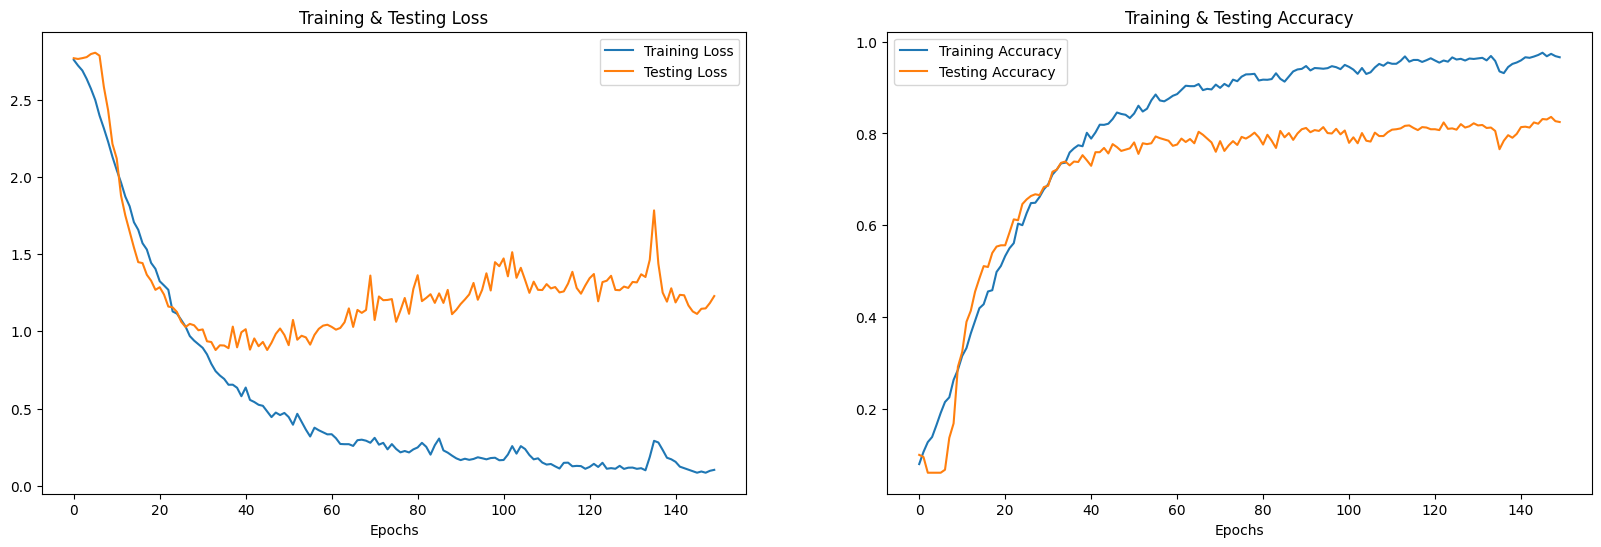

In [58]:
epochs = [i for i in range(150)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [59]:
#CNN
pred_test = model.predict(x_testcnn)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

34/34 [==============================] - 1s 4ms/step


Predicted Labels    Actual Labels
0     female_angry     female_angry
1         male_sad         male_sad
2  female_surprise     female_angry
3      female_calm      female_calm
4      female_calm      female_calm
5  female_surprise  female_surprise
6         male_sad         male_sad
7       male_happy       male_happy
8   female_disgust   female_disgust
9        male_fear        male_fear

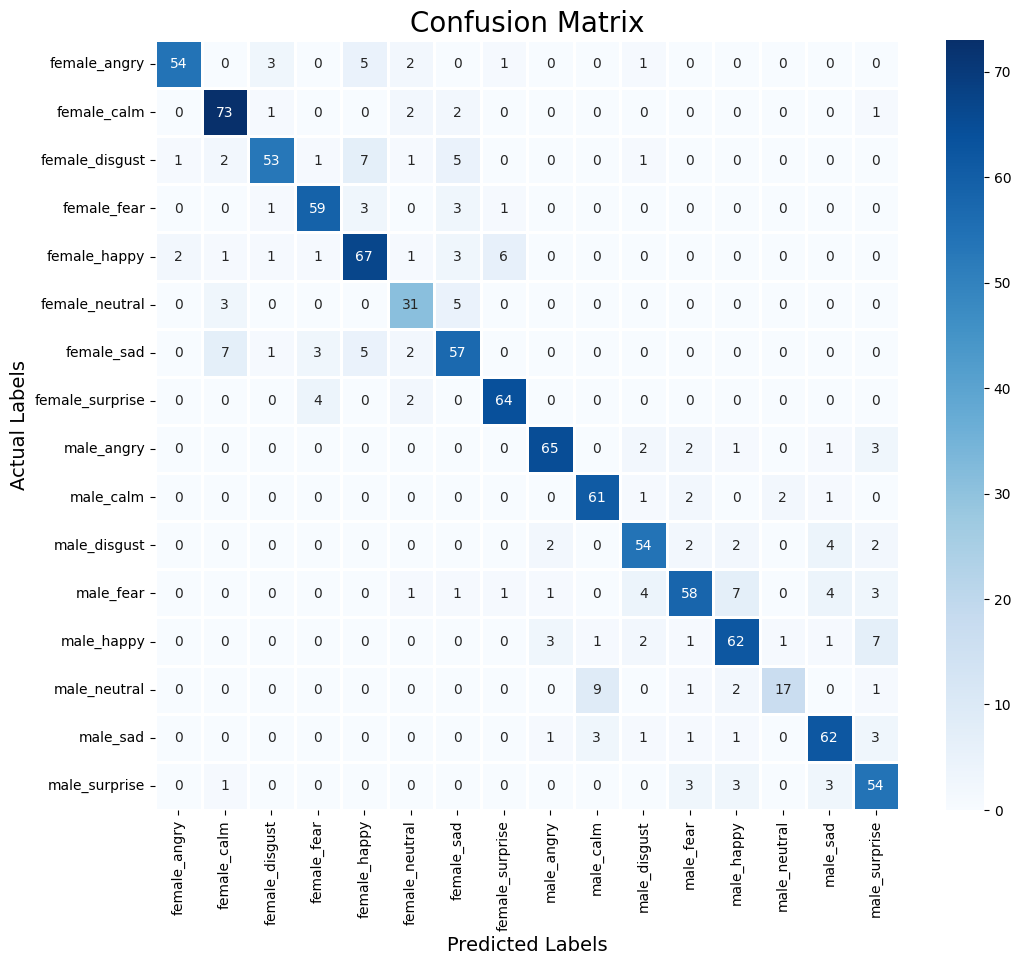

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [61]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

   female_angry       0.95      0.82      0.88        66
    female_calm       0.84      0.92      0.88        79
 female_disgust       0.88      0.75      0.81        71
    female_fear       0.87      0.88      0.87        67
   female_happy       0.77      0.82      0.79        82
 female_neutral       0.74      0.79      0.77        39
     female_sad       0.75      0.76      0.75        75
female_surprise       0.88      0.91      0.90        70
     male_angry       0.90      0.88      0.89        74
      male_calm       0.82      0.91      0.87        67
   male_disgust       0.82      0.82      0.82        66
      male_fear       0.83      0.72      0.77        80
     male_happy       0.79      0.79      0.79        78
   male_neutral       0.85      0.57      0.68        30
       male_sad       0.82      0.86      0.84        72
  male_surprise       0.73      0.84      0.78        64

       accuracy              

### SVR

In [62]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
# Step 1: Load the dataset
data = pd.read_csv('./data_sources/features.csv')  # Load your dataset
data.head()

0           1          2          3          4         5  \
0 -637.701233  104.299019   4.894947  20.494011  12.552954  2.851410   
1 -596.908460   86.871936   9.470162  17.109819  11.198966  1.541056   
2 -698.086548   99.795929   1.892679  19.915264   7.532868  1.265761   
3 -279.141052   41.092949 -21.319229   7.802911 -13.140503 -9.407660   
4 -160.074686   17.576058  -2.147436   3.133417  -4.745002 -6.510771   

           6         7          8         9  ...         11        12  \
0  -6.633390 -4.091278 -10.423918 -6.406950  ...   0.172893 -1.170210   
1  -6.677264 -5.755428  -9.684472 -6.891256  ...   0.033803 -1.986515   
2  -9.188656 -5.798194 -12.299710 -4.976400  ...  -1.639542 -2.603761   
3 -15.580647 -6.097223 -24.700903 -9.640293  ... -10.305976 -4.092835   
4  -5.911591 -4.481506  -9.470598 -5.907823  ...  -4.088007 -1.817639   

         13         14        15         16        17        18        19  \
0 -5.292450  -0.573319  1.019471  -3.492607 -3.468123 -1.214944  1.971239   
1 -5.103855  -1.253110  0.514896  -3.268317 -4.502895  0.167153  0.256732   
2 -4.890347  -0.879222 -1.250208  -3.449960 -4.708529 -0.086224 -3.034044   
3 -5.817179 -10.731523 -0.823596 -15.885103 -2.014258 -6.173852 -5.331760   
4 -2.994765  -4.893176 -2.880436  -7.163400 -2.147345 -2.359248 -3.746217   

       labels  
0   male_calm  
1   male_calm  
2   male_calm  
3  male_angry  
4  male_angry  

[5 rows x 21 columns]

In [64]:
# Extract features and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded = y_encoded.astype(float)

In [65]:

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)



In [66]:

# Step 3: Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### SVM regressor

In [67]:

# Step 4: Create and train an SVR model
svr = SVR(kernel='linear', C=1.0, epsilon=0.2)  # You can adjust the hyperparameters

svr.fit(X_train, y_train)

# Step 5: Evaluate the SVR model
y_pred = svr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 10.44741072874052
R-squared Score: 0.5149616942701876


### MLP Regressor

In [68]:
from sklearn.neural_network import MLPRegressor
# Step 4: Create and train an MLP Regressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000)

mlp_regressor.fit(X_train, y_train)

# Step 5: Evaluate the MLP Regressor
y_pred = mlp_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 3.430067684715369
R-squared Score: 0.8407534401077873


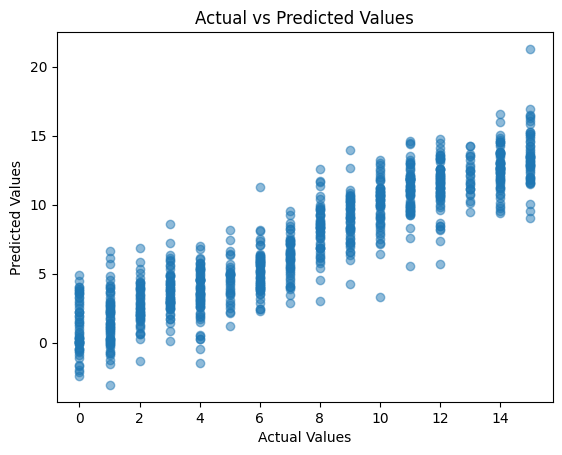

In [69]:


# Assuming y_test contains actual labels and y_pred contains predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

### Random Forest regressor 

In [70]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 5.916908912037037
R-squared (R2) Score: 0.7252977270284793


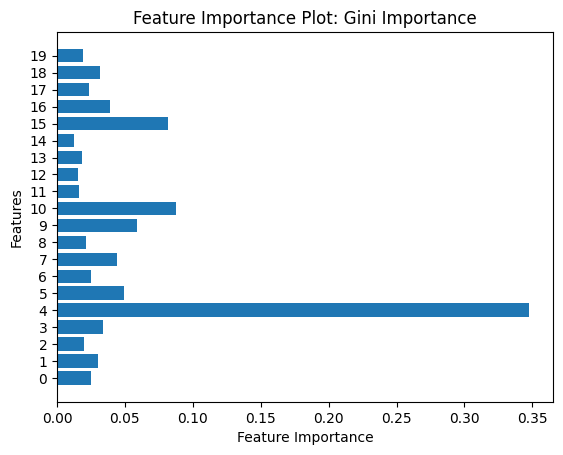

In [71]:
feature_importances = rf_regressor.feature_importances_
feature_names = data.columns[:-1]

plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot: Gini Importance")
plt.show()

In [72]:
print("Feature Import")

Feature Import


In [73]:
import os
model_name = "model03.h5"
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved trained model at /workspace/saved_models/model03.h5 


In [74]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [80]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("./saved_models/model03.h5")
print("Loaded model from disk")

Loaded model from disk


In [81]:
data, sampling_rate = librosa.load(RAVD + "Actor_01/03-01-02-02-02-01-01.wav")

In [82]:
import glob

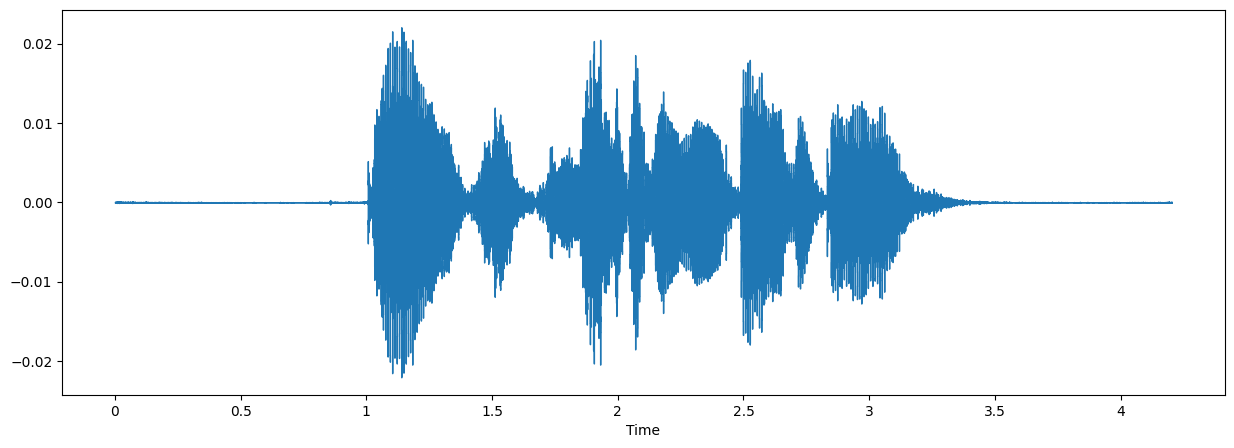

In [83]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

In [84]:
X, sample_rate = librosa.load(RAVD + 'Actor_08/03-01-01-01-01-01-08.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [85]:
livedf2= pd.DataFrame(data=livedf2)
livedf2 = livedf2.stack().to_frame().T
livedf2

0          1          2          3         4          5         6    \
           0          0          0          0         0          0         0   
0 -59.083981 -54.093624 -49.728821 -51.275261 -51.93951 -52.804752 -54.45903   

         7          8          9    ...        206        207        208  \
           0          0          0  ...          0          0          0   
0 -52.764038 -52.708351 -50.039146  ... -54.011902 -51.501469 -52.597069   

         209        210        211        212        213        214        215  
           0          0          0          0          0          0          0  
0 -52.922337 -52.165787 -53.210182 -55.510208 -55.963047 -54.293941 -51.897617  

[1 rows x 216 columns]

In [86]:
twodim= np.expand_dims(livedf2, axis=2)

In [87]:
livepreds = loaded_model.predict(twodim, batch_size=32, verbose=1)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2283, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 20, 1), found shape=(None, 216, 1)
